In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch


# First Fig

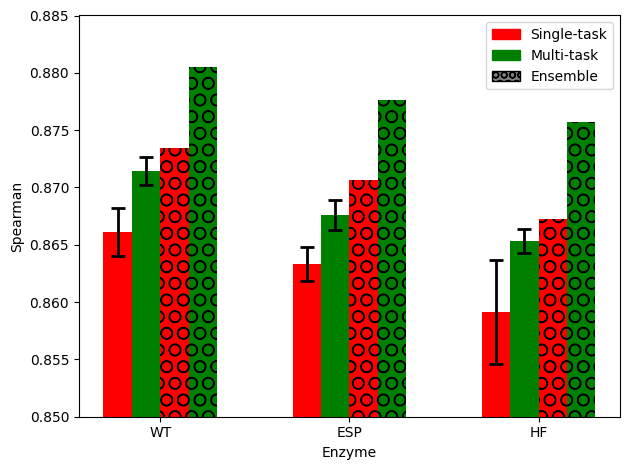

In [6]:
# Adjusted sample data to match the new order
data = {
    'WT': [(0.866129327, 0.002073498), (0.871410252, 0.001224376), (0.873438202, None), (0.880479122, None)],
    'ESP': [(0.863328868, 0.001447701), (0.867588501, 0.001287511), (0.870692818, None), (0.877605318, None)],
    'HF': [(0.859150978, 0.004511548), (0.865328354, 0.001006483), (0.867265678, None), (0.875705564, None)],
}

approaches = ['ST No Ens', 'MT No Ens', 'ST Ens', 'MT Ens']

# Plot setup
num_enzymes = len(data)
num_approaches = len(approaches)
index = np.arange(num_enzymes)  # Enzyme indices
bar_width = 0.15  # Width of a single bar

fig, ax = plt.subplots()

# Colors and patterns adjusted for the new order
colors = ['red', 'green', 'red', 'green']
hatch_patterns = ['', '', 'O', 'O']  # Circles for ensemble

for i, approach in enumerate(approaches):
    means = [data[enzyme][i][0] for enzyme in data]
    stds = [data[enzyme][i][1] if data[enzyme][i][1] is not None else 0 for enzyme in data]
    bars = ax.bar(index + i*bar_width, means, bar_width, color=colors[i], 
                  label=approach, hatch=hatch_patterns[i])
    # Add error bars only if standard deviation is provided
    error_config = {'elinewidth': 2, 'capsize': 5, 'capthick': 2, 'fmt': 'none', 'color': 'black'}
    for j, std in enumerate(stds):
        if std > 0:  # Check if std is not zero, indicating it was provided
            ax.errorbar(index[j] + i*bar_width, means[j], yerr=std, **error_config)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Enzyme')
ax.set_ylabel('Spearman')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(list(data.keys()))

# Custom legend for task and ensemble type, with adjustments
legend_elements = [
    mpatches.Patch(color='red', label='Single-task'),
    mpatches.Patch(color='green', label='Multi-task'),
    mpatches.Patch(facecolor='grey', edgecolor='k', hatch='OO', label='Ensemble')
]
ax.legend(handles=legend_elements, loc='upper right')

ax.set_ylim(0.850, 0.885)
plt.tight_layout()
plt.show()

# More Figs

In [7]:
def get_dict_avg_std(filename, datasets, categories, is_various=False):
    data = pd.read_csv(filename)
    dict_average = {}
    dict_std = {}

    for category in categories:
        dict_average[category] = []
        dict_std[category] = []

    for dataset in datasets:
        
  
        dataset_columns = [col for col in data.columns if dataset in col]
        std_column = [col for col in dataset_columns if 'Std' in col]
        average_column = [col for col in dataset_columns if 'Average' in col]
        #print(f'{dataset_columns} {std_column} {average_column}')

        for category in categories:
            #print(f'{category} {dataset}')
            if is_various and dataset == 'leenay':
                dict_average[category].append(0)
                dict_std[category].append(0)
                continue
            
            if is_various:
                category_row = data[data['method'] == category]
            else:
                category_row = data[data['TL METHOD'] == category]
            avg_value = category_row[average_column].values[0,0]
            std_value = category_row[std_column].values[0,0]
            dict_average[category].append(avg_value)
            dict_std[category].append(std_value)

    return dict_average, dict_std





In [8]:
# Example datasets and categories
original_datasets = ['xu2015TrainHl60',
            'chari2015Train293T',
            'hart2016-Rpe1Avg',
            'hart2016-Hct1162lib1Avg',
            'hart2016-HelaLib1Avg',
            'hart2016-HelaLib2Avg',
            'xu2015TrainKbm7',
            'doench2014-Hs',
            'doench2014-Mm',
            'doench2016_hg19',
            'doench2016plx_hg19',
            'morenoMateos2015',
            'leenay']
datasets = []
IDEAL_LENGTH = 26
for dataset in original_datasets:
    # add spaces to the end of the dataset name to make it IDEAL_LENGTH long
    dataset += ' ' * (IDEAL_LENGTH - len(dataset))
    datasets.append(dataset)

categories_tl = ['gl_tl', 'full_tl', 'no_em_tl', 'LL_tl', 'no_tl', 'no_pre_train']

data_means_deephf,  data_stds_deephf= get_dict_avg_std('results_dhf.csv', original_datasets, categories_tl)
data_means_crispron, data_stds_crispron= get_dict_avg_std('results_co_example.csv', original_datasets, categories_tl)

categories_various = ['wuCrispr', 'wang', 'doench', 'chariRaw']
data_means_various, data_stds_various= get_dict_avg_std('results_various.csv', original_datasets, categories_various, is_various = True)



## TL Comparison

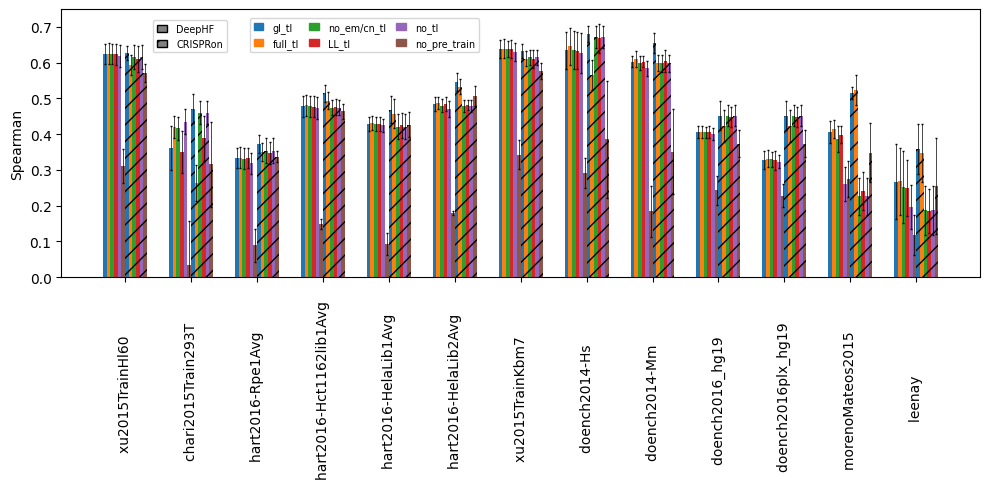

In [9]:



hex_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']



num_datasets = len(datasets)
num_categories = len(categories_tl)
total_width = 10
single_width = total_width / (num_categories+3)
bar_width = single_width / 2  # half for normal, half for OO texture
index = np.arange(num_datasets) * total_width

# Plot bars for normal model
for i, category in enumerate(categories_tl):
    plt.bar(index + i * bar_width, data_means_deephf[category], bar_width, 
            label=f'{category} (Normal)', yerr=data_stds_deephf[category], capsize=1, color = hex_colors[i], error_kw={'elinewidth': 0.5})

# Plot bars for OO texture model with 'hatch' pattern
for i, category in enumerate(categories_tl):
    plt.bar(index + (i+6) * bar_width , data_means_crispron[category], bar_width, 
            label=f'{category} (OO Texture)', hatch='//', yerr=data_stds_crispron[category], capsize=1, color = hex_colors[i], error_kw={'elinewidth': 0.5})
# Add labels, title, and legend
#plt.xlabel('Dataset')
plt.ylabel('Spearman')
plt.xticks(index-bar_width*3.5 + total_width / 2, datasets, rotation=90)


legend_1_elements = [
    mpatches.Patch(color=hex_colors[0], label='gl_tl'),
    mpatches.Patch(color=hex_colors[1], label='full_tl'),
    mpatches.Patch(color=hex_colors[2], label='no_em/cn_tl'),
    mpatches.Patch(color=hex_colors[3], label='LL_tl'),
    mpatches.Patch(color=hex_colors[4], label='no_tl'),
    mpatches.Patch(color=hex_colors[5], label='no_pre_train'),]


legend_2_elements = [
    mpatches.Patch(facecolor='grey', edgecolor='k', label='DeepHF'),
    mpatches.Patch(facecolor='grey', edgecolor='k', hatch='//', label='CRISPRon')]

legend1 = plt.legend(handles=legend_1_elements, loc='lower center', bbox_to_anchor=(0.33, 0.82), ncol=3,
            fontsize='x-small', handlelength=1, handletextpad=1, columnspacing=1)

plt.gca().add_artist(legend1)

plt.legend(handles=legend_2_elements, loc='lower center', bbox_to_anchor=(0.14, 0.82), ncol=1,
            fontsize='x-small', handlelength=1, handletextpad=1, columnspacing=1)



# make figure bigger
plt.gcf().set_size_inches(10, 5)

# set y axis limits
plt.ylim(0.0, 0.75)
# make figure bigger

# Adjust layout
plt.tight_layout()


# save the plot
plt.savefig('part1.png', dpi=300)

# Show the plot
plt.show()


## VS Other Methods

0.261295456


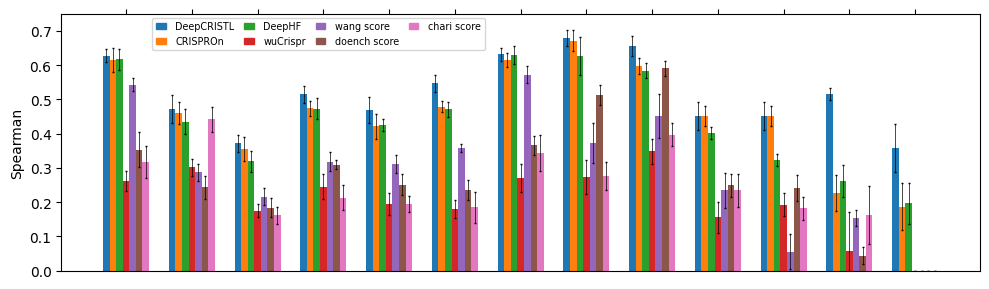

In [10]:
# Example datasets and categories
categories = ['DeepCRISTL', 'CRISPROn', 'DeepHF', 'wuCrispr', 'wang score', 'doench score', 'chari score']

# Mean Spearman scores for two models (normal and with 'OO' texture)
data_means = {
    'DeepCRISTL': data_means_crispron['gl_tl'],
    'CRISPROn': data_means_crispron['no_tl'],
    'DeepHF': data_means_deephf['no_tl'],
    'wuCrispr': data_means_various['wuCrispr'],
    'wang score': data_means_various['wang'],
    'doench score': data_means_various['doench'],
    'chari score': data_means_various['chariRaw'],
}



# Standard deviations for each category
data_stds = {
    'DeepCRISTL':  data_stds_crispron['gl_tl'],
    'CRISPROn':  data_stds_crispron['no_tl'],
    'DeepHF':  data_stds_deephf['no_tl'],
    'wuCrispr':  data_stds_various['wuCrispr'],
    'wang score':  data_stds_various['wang'],
    'doench score':  data_stds_various['doench'],
    'chari score':  data_stds_various['chariRaw'],
}

print(data_means['wuCrispr'][0])




hex_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']



num_datasets = len(datasets)
num_categories = len(categories)
total_width = 10
single_width = total_width / (num_categories+3)
bar_width = single_width 
index = np.arange(num_datasets) * total_width

# Plot bars for normal model
for i, category in enumerate(categories):
    plt.bar(index + i * bar_width, data_means[category], bar_width, 
            label=f'{category} (Normal)', yerr=data_stds[category], capsize=1, color = hex_colors[i], error_kw={'elinewidth': 0.5})

# Add labels, title, and legend
# show x label on top
#plt.xlabel('Dataset')
plt.ylabel('Spearman')
#plt.xticks(index-bar_width*2+ total_width / 2, datasets, rotation=90)
# same but xticks are above the bars
#plt.xticks(index-bar_width*2 + total_width / 2, None)
# remove xticks
plt.xticks([])


legend_elements = [
    mpatches.Patch(color=hex_colors[0], label='DeepCRISTL'),
    mpatches.Patch(color=hex_colors[1], label='CRISPROn'),
    mpatches.Patch(color=hex_colors[2], label='DeepHF'),
    mpatches.Patch(color=hex_colors[3], label='wuCrispr'),
    mpatches.Patch(color=hex_colors[4], label='wang score'),
    mpatches.Patch(color=hex_colors[5], label='doench score'),
    mpatches.Patch(color=hex_colors[6], label='chari score'),
]





plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.28, 0.84), ncol=4,
            fontsize='x-small', handlelength=1, handletextpad=1, columnspacing=1)

# make figure bigger
plt.gcf().set_size_inches(10, 3)

# set y axis limits
plt.ylim(0.0, 0.75)

# show x axis on top
plt.gca().xaxis.set_ticks_position('top')

plt.xticks(index-bar_width*2 + total_width / 2, [], rotation=90)



# Adjust layout
plt.tight_layout()


# save the plot
plt.savefig('part2.png', dpi=300)

# Show the plot
plt.show()


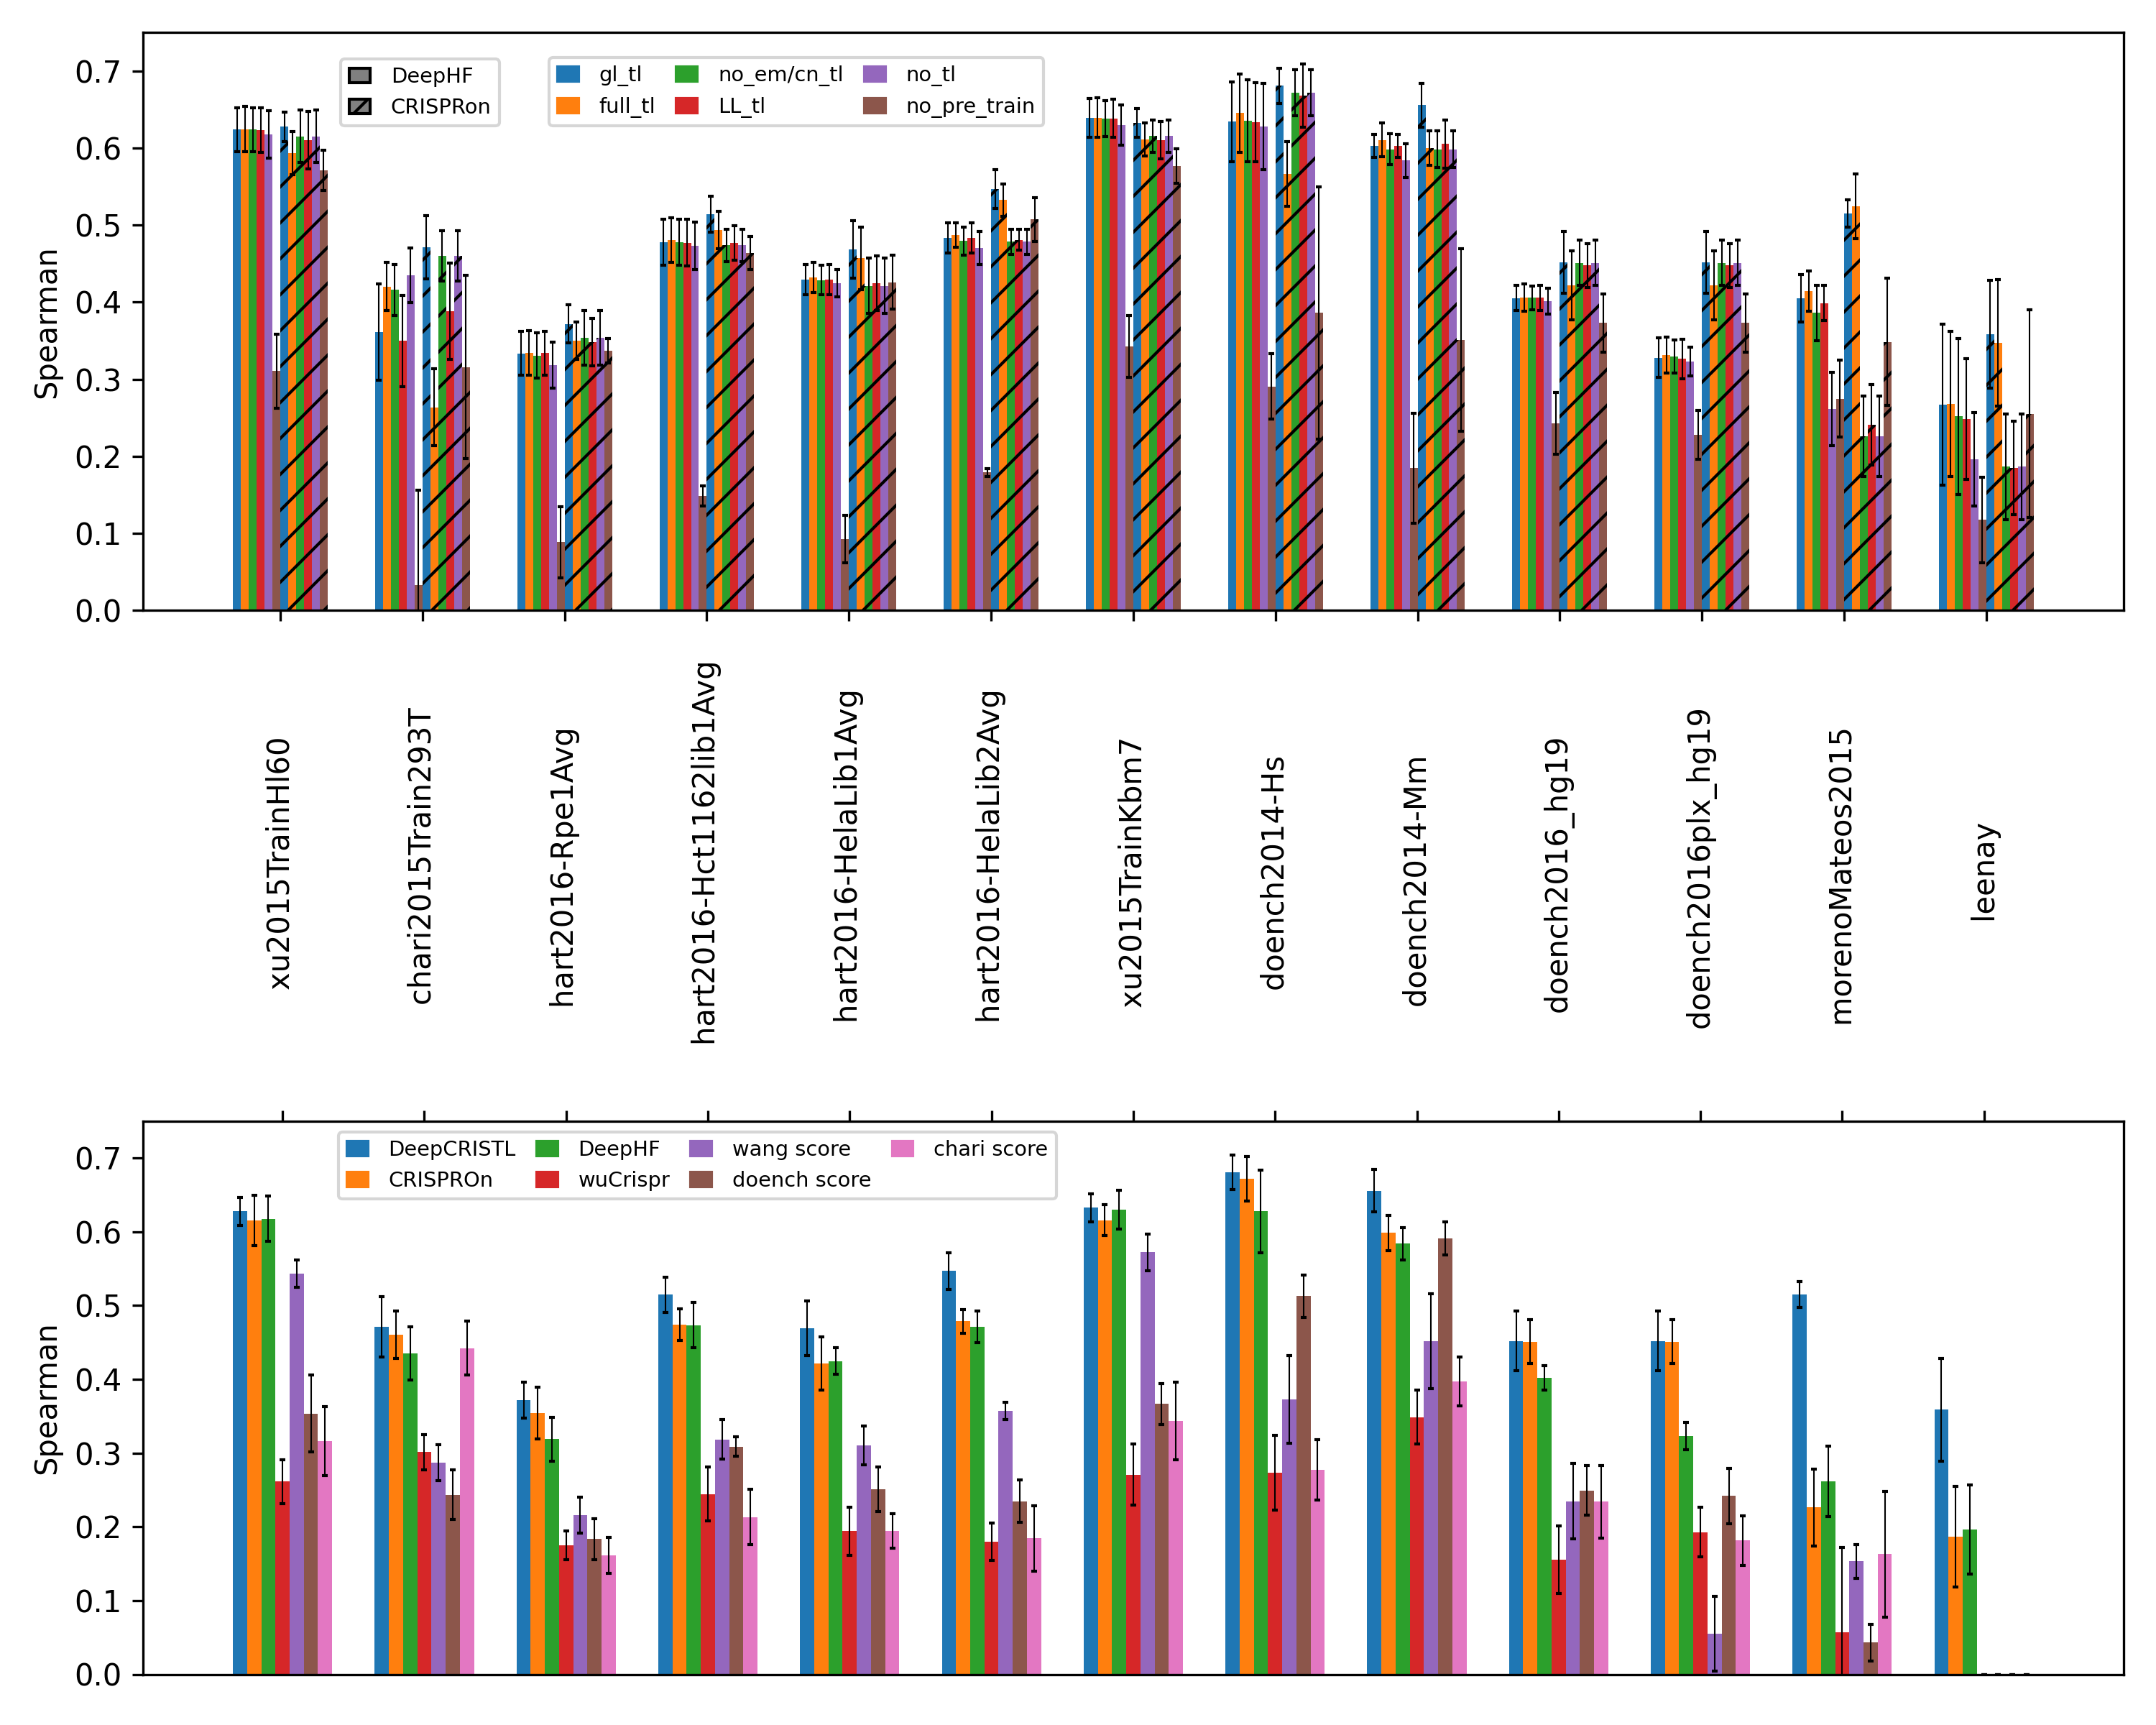

In [11]:
# combine
from PIL import Image
def merge_images_vertically(img_path1, img_path2, output_path):
    # Open the images
    image1 = Image.open(img_path1)
    image2 = Image.open(img_path2)
    
    # Calculate the size of the output image
    width = max(image1.width, image2.width)
    height = image1.height + image2.height
    
    # Create a new image with the calculated size
    new_image = Image.new('RGB', (width, height))
    
    # Paste the first image at the top
    new_image.paste(image1, (0, 0))
    
    # Paste the second image below the first one
    new_image.paste(image2, (0, image1.height))
    
    # Save the new image
    new_image.save(output_path)

# Example usage
merge_images_vertically('part1.png', 'part2.png', 'combined.png')


# Show the combined image



# delete all 3 images
import os
os.remove('part1.png')
os.remove('part2.png')
#os.remove('combined.png')

Image.open('combined.png')
